### Boxplots

A compreensão de Boxplots requer uma rápida revisão sobre Percentil e Quartil.

#### Percentil

Percentil é uma medida de posição, ele é útil para entendermos como nossos dados estão distribuídos. Utilizando um exemplo muito comum de blogs de cientistas de dados vamos criar um exemplo com 20 notas de uma prova entre 0 e 100:

~~~python
    [14, 20, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 92, 94, 96, 100]
~~~

Agora desejo obter um valor onde 25% dos dados são menores ou igual a ele, para isso utilizamos a seguinte formula:

    (Percentual x Tamanho dos Dados) / 100

Aplicando com os dados do exemplo acima: 

    (25 * 20) / 100 =  5

A posição 5 no nosso intervalo de dados é 34, ou seja, 25% das notas são iguais ou menores a 34.
Em termos técnicos podemos dizer que o percentil 25 dos nosso dados é 34.


#### Quartil

Agora podemos falar sobre Quartis, na prática são o Percentil 25%, 50% e 75% técnicamente chamados de Q1, Q2 e Q3. 

Importante lembrar que:

    O Q2 (segundo quartil) - O Percentil 50% e a Mediana serão sempre o mesmo valor.

### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)

In [4]:
import pandas as pd

BASE = "../datasets/HR-Employee-Attrition.csv"

df = pd.read_csv(BASE)


# Limpando a base de colunas com valores não variam e removendo a
# coluna de identificação (EmployeeNumber)

df = df.drop("EmployeeNumber", axis=1)

for c in df.columns:
    column = df[c]
    if (column.nunique() <= 1):
        print(f"Removendo coluna {c}") 
        df = df.drop(c, axis=1)


# Separando nossas colunas por variáveis categóricas ordenadas e 
# não ordernadas


# Colunas que são categóricas e não ordenadas
columns_categorical_not_ordered = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Colunas que são categóricas e ordernadas
columns_categorical_ordered = [
    'Education',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance',
    'JobInvolvement'
]

target_column = ['Attrition']


numeric_columns = [
    column
    for column in df.columns
    if column not in (columns_categorical_ordered + columns_categorical_not_ordered + target_column)
]


# Convertendo nossas colunas não ordernadas para o tipo category
### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)
for column in columns_categorical_not_ordered:
    df[column] = df[column].astype("category")

Removendo coluna EmployeeCount
Removendo coluna Over18
Removendo coluna StandardHours


### Visualizando boxplot com base na coluna "DistanceFromHome":


Vamos visualizar que o boxplot tem sua exibição com base em 5 valores: 

    - Mediana (Q2 ou 50º percentil)
    - Primeiro Quartil (Q1)
    - Terceiro Quartil (Q3)
    - Máximo  (Q100 ou 100º percentil)
    - Minimo  (Q0 ou 0º percentil)


Além destes valores é possível visualizarmos também o IQR (distância entre o Q3 e Q1) 

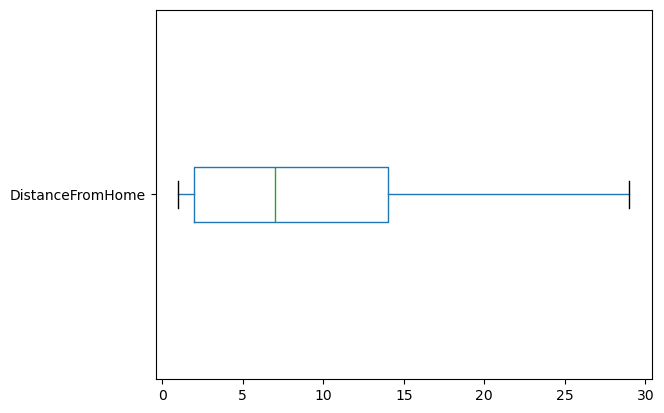

In [19]:
df.boxplot(column="DistanceFromHome", vert=False, grid=False);

#### O que é a Mediana - Q2 - P50 no bloxplot?

A linha verde representa mediana, ou seja, 50% dados estão acima ou abaixo dela. 

Ela é igual a: 

 ~~~python
    df["DistanceFromHome"].describe()["50%"] # 7.0
 ~~~

#### O que é o Q1 - P25 no bloxplot?

A linha vertical a esquerda que fecha a caixa:

~~~markdown
              ____________
             |            |
 esta   <--- |            | 
             |____________| 
~~~



Ela é igual a: 

 ~~~python
    df["DistanceFromHome"].describe()["25%"] # 14.0
 ~~~


#### O que é o Q3 - P75 no bloxplot?

A linha vertical a direita que fecha a caixa:

~~~markdown
     ____________
    |            |
    |            | ---> esta (Se estivéssemos visualizando um boxplot imprimido verticalmente seria a linha do topo)
    |____________| 
~~~



Ela é igual a: 

 ~~~python
    df["DistanceFromHome"].describe()["75%"] # 14.0
 ~~~

#### O que é o Q100 - P100 no bloxplot?

A linha vertical mais extrema a direita depois da reta horizontal representa o valor máximo dos nossos dados:

~~~markdown
     ____________
    |            |
    |            |--------| ---> esta 
    |____________| 
~~~

Ela é igual a 

~~~python
    df["DistanceFromHome"].describe()["max"] # 29.0
~~~

#### O que é o Q0- P0 no bloxplot?

A linha vertical mais extrema a esquerda antes da reta horizontal representa o valor mínimo dos nossos dados:

~~~markdown
                    ____________
                   |            |
esta <--- |--------|            | 
                   |____________| 
~~~

Ela é igual a 

~~~python
    df["DistanceFromHome"].describe()["min"] # 1.0
~~~

#### Visualizando a média no boxplot

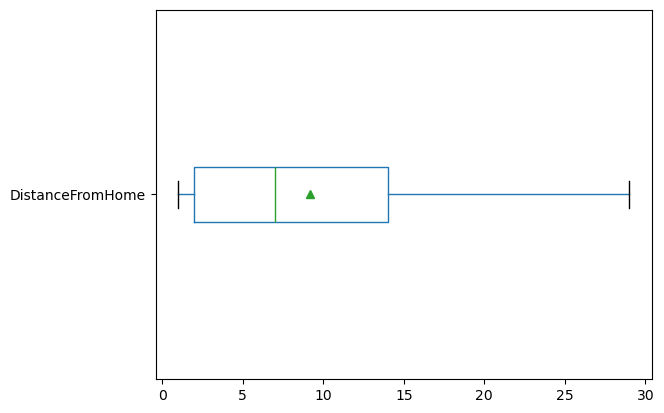

In [35]:
df.boxplot(column="DistanceFromHome", vert=False, grid=False, showmeans=True);